In [1]:
import torch
from torchvision.datasets import VisionDataset
from torchvision import transforms

/home/uichan/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from skimage.io import imread, imshow
import os
from tqdm import tqdm

In [31]:
#url : http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz

class NotMNIST(VisionDataset):
    def __init__(self, root, train = True, transform = None, target_transform = None):
        super().__init__(root, transforms = transform, target_transform= target_transform)
        self.transform = transform
        self.data, self.target = self.load_data(root)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image_name = self.data[index]
        image = imread(image_name)
        label = self.target[index]

        if self.transform:
            image = self.transform(image)
        return image, label
    
    def load_data(self, path):
        datas = []
        targets = []

        for target in tqdm(os.listdir(path)):
            file_names = [os.path.abspath(os.path.join(path, target, x)) for x in os.listdir(os.path.join(path, target))]
            targets.extend([target] * len(file_names))
            datas.extend(file_names)

        return datas, targets

    

In [32]:
data_set = NotMNIST("/home/uichan/Desktop/Dataset/notMNIST")

100%|██████████| 10/10 [00:01<00:00,  7.06it/s]


529119
D


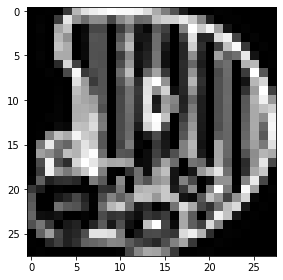

In [33]:
print(len(data_set))
num = 50000
image, data = data_set[num]
print(data)
imshow(image)

In [34]:
data_transform = transforms.Compose([
    #transforms.RandomResizedCrop([224,224]),
    #transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
    #transforms.Normalize(mean = [0.5,0.5,0.5], std = [0.3,0.2,0.2])
])
dataset = NotMNIST("/home/uichan/Desktop/Dataset/notMNIST", transform=data_transform)
data_loader = torch.utils.data.DataLoader(dataset, batch_size = 128, shuffle = True)

100%|██████████| 10/10 [00:01<00:00,  7.50it/s]


In [35]:
image, label = next(iter(data_loader))
print(label)
image.shape
print(image)



('C', 'E', 'B', 'A', 'B', 'D', 'D', 'G', 'D', 'D', 'E', 'E', 'G', 'G', 'J', 'H', 'J', 'I', 'B', 'A', 'G', 'A', 'E', 'I', 'H', 'G', 'D', 'A', 'C', 'B', 'G', 'F', 'B', 'G', 'A', 'D', 'C', 'E', 'I', 'E', 'H', 'E', 'F', 'F', 'C', 'J', 'E', 'G', 'G', 'A', 'B', 'G', 'C', 'J', 'D', 'C', 'A', 'J', 'G', 'G', 'B', 'C', 'A', 'I', 'G', 'D', 'I', 'H', 'J', 'E', 'I', 'G', 'D', 'E', 'E', 'I', 'F', 'C', 'A', 'J', 'A', 'C', 'A', 'J', 'B', 'F', 'J', 'H', 'A', 'G', 'F', 'H', 'H', 'H', 'J', 'C', 'D', 'B', 'H', 'B', 'H', 'D', 'A', 'I', 'F', 'D', 'C', 'A', 'J', 'A', 'H', 'E', 'C', 'C', 'I', 'H', 'H', 'C', 'B', 'A', 'G', 'J', 'E', 'H', 'E', 'I', 'C', 'A')
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.8078, 0.3059, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 1.0000, 0.7059, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 1.0000, 0.6000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 1.0000, 0.3922, 0.0000],
          [0.0